# Import bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import copy as cp

# Inicializar parametros
##### w --> pesos (w1, w2, b)
##### training_data --> [[x1, x2, contante_1], saida]
##### learning_rate = 0.1
##### max_it = 10
##### erros = []

In [2]:
w = np.array([0.3092, 0.3092])
#w = np.random.rand(3)
learning_rate = 0.1
max_it = 10
erros = []
training_data = [ (np.array([0.0, 0.0]), 0.0), 
                  (np.array([0.0, 1.0]), 0.0), 
                  (np.array([1.0, 0.0]), 0.0), 
                  (np.array([1.0, 1.0]), 1.0), ]
limite = 0.5
print ('w: ', w)
print ('learning_rate: ', learning_rate)
print ('max_it: ', max_it)
print ('erros: ', erros)
print ('training_data: ', training_data)
print ('limite (valor ativação): ', limite)

w:  [ 0.3092  0.3092]
learning_rate:  0.1
max_it:  10
erros:  []
training_data:  [(array([ 0.,  0.]), 0.0), (array([ 0.,  1.]), 0.0), (array([ 1.,  0.]), 0.0), (array([ 1.,  1.]), 1.0)]
limite (valor ativação):  0.5


# Separar dados de treinamento e resultado esperado

In [3]:
#x, resultado_esperado = choice(training_data) 
x=[]
resultado_esperado=[]
for i in range(len(training_data)):
    x_temp, resultado_esperado_temp = training_data[i]
    x.append(x_temp)
    resultado_esperado.append(resultado_esperado_temp)
    
print ('x: ', x)
print ('resultado_esperado: ', resultado_esperado)

x:  [array([ 0.,  0.]), array([ 0.,  1.]), array([ 1.,  0.]), array([ 1.,  1.])]
resultado_esperado:  [0.0, 0.0, 0.0, 1.0]


# Função predição

In [4]:
def predicao(x, w):
    fx_temp = np.dot(x, w) 
    pred_temp = np.where(fx_temp > limite, 1, 0)
    return fx_temp, pred_temp

In [5]:
fx_temp, pred_temp = predicao(x, w)
print (fx_temp, pred_temp, resultado_esperado)

[ 0.      0.3092  0.3092  0.6184] [0 0 0 1] [0.0, 0.0, 0.0, 1.0]


# Função grafico(w_calc) 
Função de plota gráfico de linha de decisão

In [6]:
def grafico(w, titulo, x, resultado_esperado):
    plt.title(titulo)
    plt.xlabel('x1')
    plt.ylabel('x2')
    X = np.copy(x)
    
    #Obter valores máximos e mínimos de plotagem de acordo com a entrada
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    #Gerar dados entre limites e plotar cores do gráfico de contorno
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    aa = np.c_[xx.ravel(), yy.ravel()]
    fx_graf, pred_graf = predicao(aa, w)
    Z = pred_graf.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    #Plotar reta pontilhada no gráfico
    w1 = w[0]
    w2 = w[1]
    x1 = np.arange(x_min, x_max, h)
    x2 = np.zeros(len(x1))
    for i in range(len(x1)):
        x2[i] = ( limite - w1 * x1[i] ) / w2
    plt.plot(x1, x2,'--k')
    
    #Configurar limites de plotagem de cada eixo
    axes = plt.gca()
    axes.set_xlim([x_min,x_max])
    axes.set_ylim([y_min,y_max])
    
    #Plotar pontos no gráfico
    for i in range(len(x)):
        if resultado_esperado[i] == 0:
            plt.scatter(x[i][0], x[i][1],  c='darkred')
        else:
            plt.scatter(x[i][0], x[i][1], c='darkblue')
    plt.show()

# Função para cálculo do Perceptron
#### perceptron(w, max_it, learning_rate, x, resultado_esperado)
#### retorna w

In [7]:
def perceptron(w, max_it, learning_rate, x, resultado_esperado, verbose=False):
    epoca = 0
    erros_epocas= []
    erro_epoca = 1.0
    while (epoca < max_it and erro_epoca != 0.0):
        erro_epoca = 0.0
        w_anterior = cp.copy(w)
        for i in range(len(x)):
            fx, pred = predicao(x, w)  
            erro_amostra = (resultado_esperado[i] - pred[i]) 
            w += learning_rate * erro_amostra * x[i]
            erro_epoca += abs(erro_amostra)
        erros_epocas.append(erro_epoca)
        
        if (verbose):
            titulo = 'Epoca: '+ str(epoca) +', erro: ' + str(erro_epoca)
            print (titulo)
            print ('w: ', w_anterior)
            grafico(w_anterior, titulo, x, resultado_esperado)
        epoca += 1
    return cp.copy(w), cp.copy(erros_epocas), cp.copy(epoca)

# Executar função Perceptron

Epoca: 0, erro: 0.0
w:  [ 0.3092  0.3092]


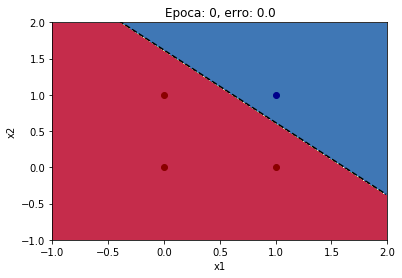

w_calc:  [ 0.3092  0.3092]
erro na ultima epoca 1 :  0.0


In [8]:
w = np.array([0.3092, 0.3092])
#w = np.random.rand(3)
learning_rate = 0.1
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, True)

print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])

# Avaliar resultado final para todos os pontos

In [9]:
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)

[ 0.      0.3092  0.3092  0.6184]
[0 0 0 1]


In [10]:
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.3092  ->  0
ponto:  [ 1.  0.] :  0.3092  ->  0
ponto:  [ 1.  1.] :  0.6184  ->  1


# Somatorio de erros a cada epoca

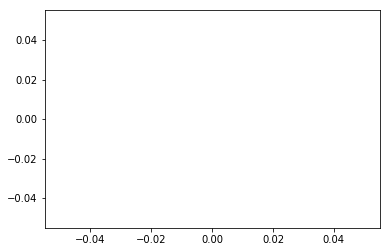

In [11]:
plt.plot(erros_calc)
plt.show()

In [12]:
taxa_aprendizagens = np.arange(0.1, 1.0, 0.1)
taxa_aprendizagens

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

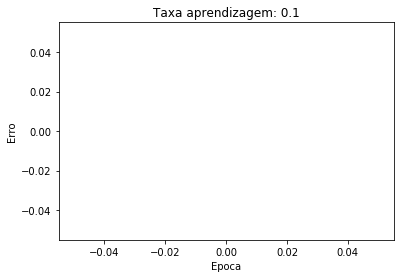

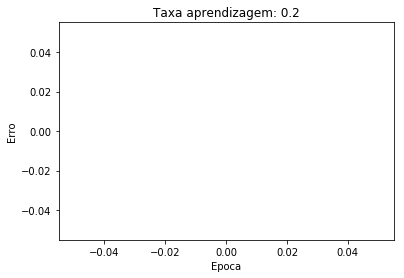

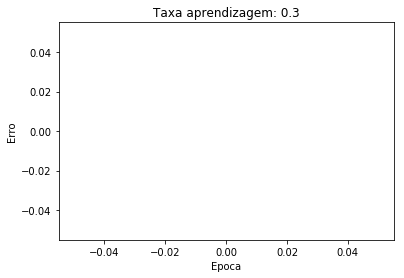

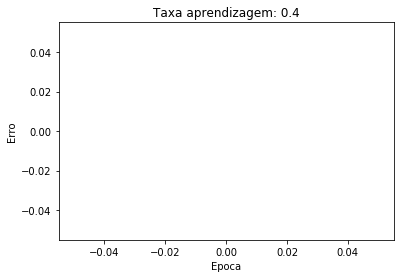

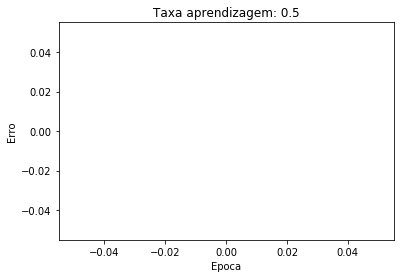

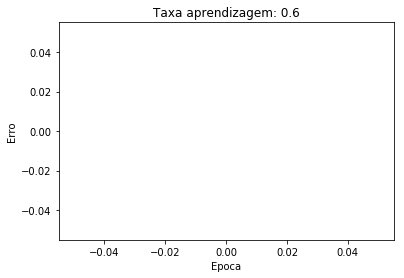

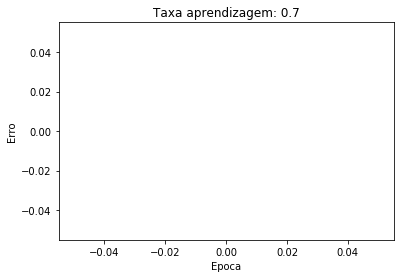

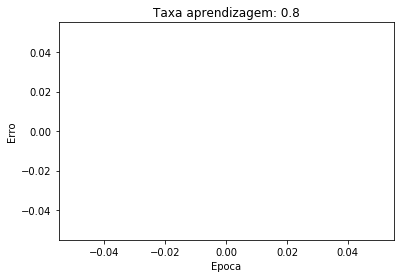

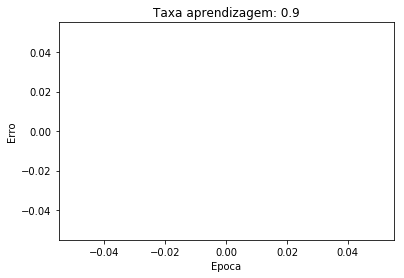

In [13]:
for i in taxa_aprendizagens:
    w = np.array([0.3092, 0.3092])
    w_calc, erros_calc, j = perceptron(w, max_it, i, x, resultado_esperado, False)
    plt.title("Taxa aprendizagem: " + str(i))
    plt.ylabel("Erro")
    plt.xlabel("Epoca")
    plt.plot(erros_calc)
    plt.show()

# Verificar comportamento da função Perceptron com:
# todos os pesos = 0
Considerando learning_rate = 0.5 e max_it = 100
#### o algoritmo convergiu!!!

Epoca: 0, erro: 1.0
w:  [ 0.  0.]


D:\Programas\Anaconda3\envs\rnp_ufg\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


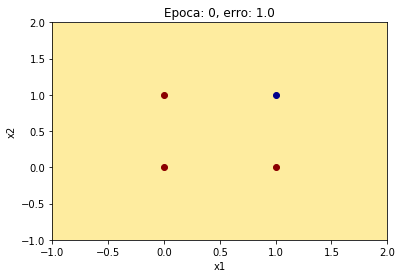

Epoca: 1, erro: 1.0
w:  [ 0.1  0.1]


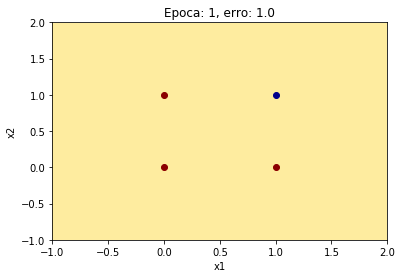

Epoca: 2, erro: 1.0
w:  [ 0.2  0.2]


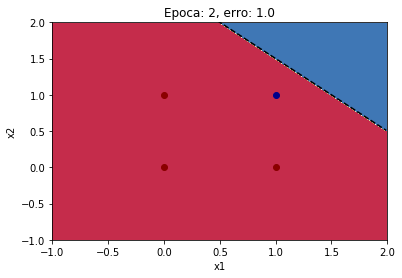

Epoca: 3, erro: 0.0
w:  [ 0.3  0.3]


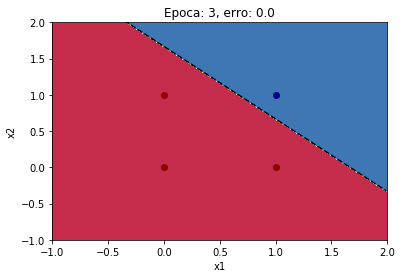

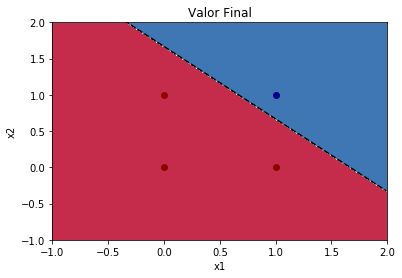

w_calc:  [ 0.3  0.3]
erro na ultima epoca 4 :  0.0
[ 0.   0.3  0.3  0.6]
[0 0 0 1]
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.3  ->  0
ponto:  [ 1.  0.] :  0.3  ->  0
ponto:  [ 1.  1.] :  0.6  ->  1


In [14]:
w = np.array([0.0, 0.0])
learning_rate = 0.1
max_it = 100
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, True)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

## Verificar comportamento da função Perceptron com:
## todos os pesos = 10 (positivos)
Considerando learning_rate = 0.1 e max_it = 100
#### o algoritmo convergiu!!!

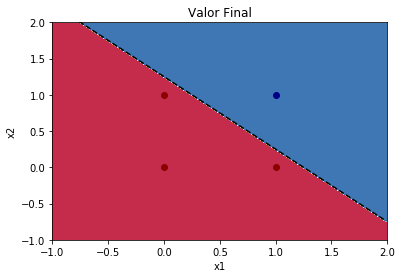

w_calc:  [ 0.4  0.4]
erro na ultima epoca 97 :  0.0
[ 0.   0.4  0.4  0.8]
[0 0 0 1]
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.4  ->  0
ponto:  [ 1.  0.] :  0.4  ->  0
ponto:  [ 1.  1.] :  0.8  ->  1


In [15]:
w = np.array([10.0, 10.0])
learning_rate = 0.1
max_it = 100
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Perceptron com todos:
## os pesos = 1 (positivos) 
Considerando learning_rate = 0.1 e max_it = 100
#### O algoritmo convergiu!!!

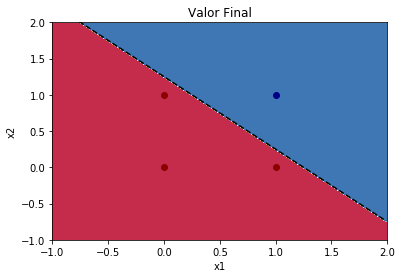

w_calc:  [ 0.4  0.4]
erro na ultima epoca 7 :  0.0
[ 0.   0.4  0.4  0.8]
[0 0 0 1]
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.4  ->  0
ponto:  [ 1.  0.] :  0.4  ->  0
ponto:  [ 1.  1.] :  0.8  ->  1


In [16]:
w = np.array([1.0, 1.0])
learning_rate = 0.1
max_it = 100
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Perceptron com todos:
## os w1 = -0.123 (negativo), w1 = 0.123 (positivo) 
Considerando learning_rate = 0.1 e max_it = 100
### O algoritmo convergiu!!!

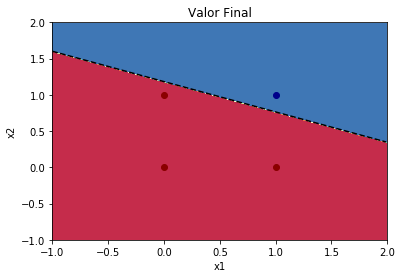

w_calc:  [ 0.177  0.423]
erro na ultima epoca 4 :  0.0
[ 0.     0.423  0.177  0.6  ]
[0 0 0 1]
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.423  ->  0
ponto:  [ 1.  0.] :  0.177  ->  0
ponto:  [ 1.  1.] :  0.6  ->  1


In [17]:
w = np.array([-0.123, 0.123])
learning_rate = 0.1
max_it = 100
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_final, pred_final = predicao(x, w_calc)
print (fx_final)
print (pred_final)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_final[i], ' -> ', pred_final[i])

# Verificar comportamento da função Perceptron com todos:
## os w1 = 1.0 (positivo), w1 = -1 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
### O algoritmo convergiu!!!

ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  -1.0  ->  0
ponto:  [ 1.  0.] :  1.0  ->  1
ponto:  [ 1.  1.] :  0.0  ->  0
w:  [ 1. -1.]


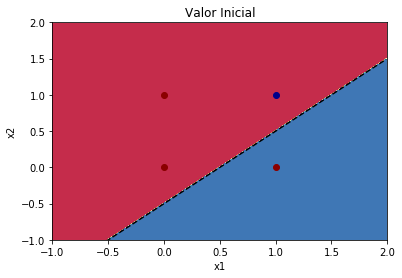

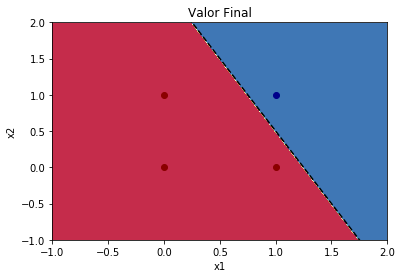

w_calc:  [ 0.4  0.2]
erro na ultima epoca 19 :  0.0
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.2  ->  0
ponto:  [ 1.  0.] :  0.4  ->  0
ponto:  [ 1.  1.] :  0.6  ->  1


In [18]:
w = np.array([1.0, -1.0])
fx_tmp, pred_tmp = predicao(x, w)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_tmp[i], ' -> ', pred_tmp[i])
learning_rate = 0.1
max_it = 100
print ('w: ', w)
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_tmp, pred_tmp = predicao(x, w_calc)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_tmp[i], ' -> ', pred_tmp[i])

# Verificar comportamento da função Perceptron com todos:
## os w1 = 5.0 (positivo), w1 = -0.1 (negativo)
Considerando learning_rate = 0.1 e max_it = 100
### O algoritmo convergiu!!!

ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  -0.1  ->  0
ponto:  [ 1.  0.] :  5.0  ->  1
ponto:  [ 1.  1.] :  4.9  ->  1
w:  [ 5.  -0.1]


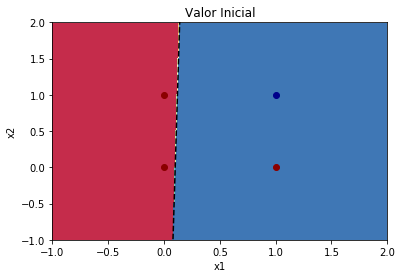

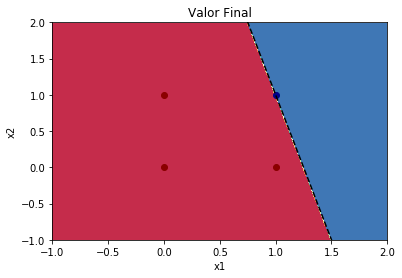

w_calc:  [ 0.4  0.1]
erro na ultima epoca 49 :  0.0
ponto:  [ 0.  0.] :  0.0  ->  0
ponto:  [ 0.  1.] :  0.1  ->  0
ponto:  [ 1.  0.] :  0.4  ->  0
ponto:  [ 1.  1.] :  0.5  ->  1


In [19]:
w = np.array([5.0, -0.1])
fx_tmp, pred_tmp = predicao(x, w)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_tmp[i], ' -> ', pred_tmp[i])
learning_rate = 0.1
max_it = 100
print ('w: ', w)
grafico(w, 'Valor Inicial', x, resultado_esperado)
w_calc, erros_calc, j = perceptron(w, max_it, learning_rate, x, resultado_esperado, False)
grafico(w_calc, 'Valor Final', x, resultado_esperado)
print ('w_calc: ', w_calc)
print ('erro na ultima epoca', j, ': ', erros_calc[j-1])
fx_tmp, pred_tmp = predicao(x, w_calc)
for i in range(len(x)):
    print ('ponto: ', x[i][:2], ': ', fx_tmp[i], ' -> ', pred_tmp[i])